# Just the Facts: Visualization (Mis)Use in the U.S. Gun Violence Debate

by Constance McCarney

This collection of graphs is inspired by an article on Vox.com by George Lopez which uses 17 data visualizations to argue for stronger gun control in the U.S. It's key here to remember that while data gives a semblance of neutrality, an illusion of being neither for nor against any specific argument but of simply stating the facts, data visualization is a tool. <br>
<br>
Using three graphs from the Vox article as a starting point, I first identify ways in which these graphs can be replicated and improved upon. Then after making a stronger, more truthful argument with the data, I then turn around and create graphs from that same data which offer a counter argument. These charts are intentionally deceptive; they employ tactics that knowingly distort the data and present a differing conclusion. So the following visuals takes data on gun laws, deaths, suicides, etc. and creates arguments that contradict the idea that guns are a unique cause of unnecessary death and that we as a society can do something about it.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')

%autosave 0

Autosave disabled


#  Suicide Method and Fatality

![Chart-12](images/vox-chart-12.jpg)
Chart 12 is comparing the mortality rate among three methods of suicide. The graphs convey this meaning well, but the limitations of the data undermine the applicability of the claim. The original graphs compare methods of injury from firearms, cutting, and poisoning from Indiana during the years 1990-1997. My redesign of this graphic I have gathered information from the CDC's WISQARS tool on self-inflicted fatal and non-fatal injuries in all US from 2001 to 2016.

In [2]:
self = pd.read_csv('WISQARS.csv')
df10 = self.groupby(['Injury','Fatal']).mean().reset_index()

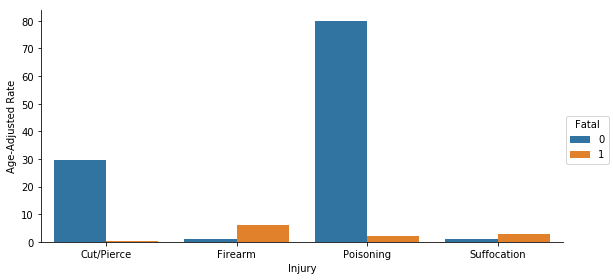

In [3]:
sns.factorplot(x='Injury', y='Age-Adjusted Rate',hue='Fatal', data=df10, kind='bar',aspect=2)

At this point, the main advantage of the new visual is really just in its validity. It represents data from all 50 states over the years 2001-2016. The inclusion of suffocation methods also helps show that we are talking about lethality of a method. Still, the visual itself needs to be modified to better demonstrate the parts to whole argument.<br>
<br>
To make the lethality of guns clearer and therefore the point of the graph more explicit, I've created a new data point which identifies the fatality rate for any particular method of self harm.

In [4]:
df11 = pd.read_csv('WISQARS2.csv')
df11['Total Self-Harm'] = df11['Self-Harm'] + df11['Suicides']
df11['Fatality Percent'] = (df11['Suicides']/df11['Total Self-Harm'])*100
df12 = df11.groupby('Injury').mean().reset_index()

Text(0.5,1,'Fatality Rate of Suicide Attempts by Method, U.S. 2001-2016')

Text(0.5,1.05,'Guns Make Suicide Attempts More Deadly')

Text(-0.5,-10,'Source: CDC WISQARS')

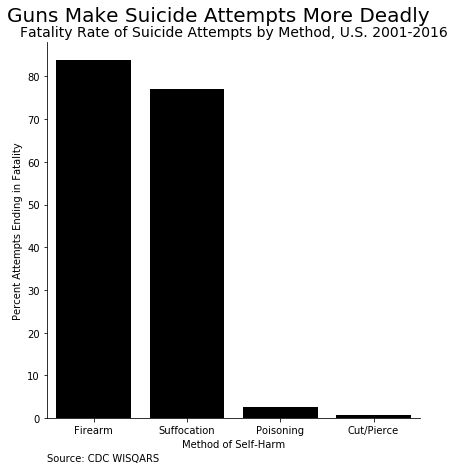

In [5]:
sns.factorplot(x='Injury', y='Fatality Percent', data=df12, kind='bar', color='k', size=6,\
               order=['Firearm','Suffocation','Poisoning','Cut/Pierce'])\
.set_axis_labels('Method of Self-Harm','Percent Attempts Ending in Fatality')

plt.title('Fatality Rate of Suicide Attempts by Method, U.S. 2001-2016', fontsize=14)
plt.suptitle('Guns Make Suicide Attempts More Deadly', y=1.05, fontsize=20)
plt.text(-.5,-10,u'Source: CDC WISQARS', fontsize=10)

The final graph above improves on the previous version by eliminating the confusion that arrises when the rate of self-harm is directly compared with the rate of suicides. It pulls out the essential information, which is how lethal guns are, and then goes further to correct the aspect ratio, add more descriptive labels and titles, remove color, and sort the values. Arguably, the inclusion of suffocation may detract from the arguement against guns. However, guns are still more lethal, and additionally it would have been dishonest to exclude the information after determining that it didn't bolster my arguement.

## Counter graph: Guns are not the main method for attempting suicide

The purpose of this graph is to confuse the connection between suicides and guns. The previous graph showed that guns are far more fatal than other methods of attempting suicide. This means that when a person tries to commit suicide using a gun, it is much more likely that the person will die than had the attempt been made by say, poisoning. 
<br>
But a different conclusion can be drawn using the same dataset as the previous graph. Rather than looking at the fatality percent, I will look at the total number of suicide attempts, or self-harm events. These numbers have already been averaged over to time within the injury method category.

"This graph shows the average annual number of suicide attempts in the US from 2001 to 2016 by method of self-harm. Clearly, if we want to stop people trying to kill themselves, then we should be far more concerned with poisoning than with firearms."

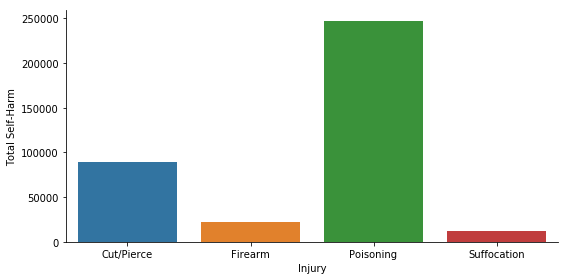

In [6]:
sns.factorplot(x='Injury', y='Total Self-Harm', data=df12, kind='bar',aspect=2)

The deception tactic here is in the background grouping of the data. By eliminating the distinction between fatal and non-fatal suicides attempts the graph implies that targeting firearms is less likely to affect suicides. But the distinction between fatal and non-fatal is crucial because the entire reason for targeting firearms is that they are more lethal than other methods of self-harm. The final graph below improves this by correcting the aspect ratio, adding more descriptive labels and titles, removing color, and sorting the values. These features remove elements that would otherwise distract from the message of the graph.

Text(0.5,1,'Number of Suicide Attempts by Method, U.S. 2001-2016')

Text(0.5,1.06,'Guns Do Not Drive Suicide Attempts')

Text(-1,-25000,'Source: CDC WISQARS')

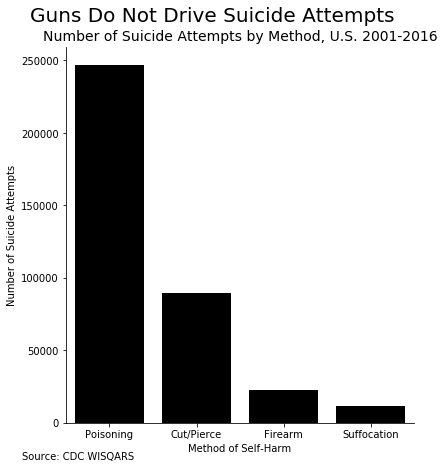

In [7]:
sns.factorplot(x='Injury', y='Total Self-Harm', data=df12, kind='bar', color='k', size=6,\
               order=['Poisoning','Cut/Pierce','Firearm','Suffocation'])\
.set_axis_labels('Method of Self-Harm','Number of Suicide Attempts')

plt.title('Number of Suicide Attempts by Method, U.S. 2001-2016', fontsize=14)
plt.suptitle('Guns Do Not Drive Suicide Attempts', y=1.06, fontsize=20)
plt.text(-1,-25000,u'Source: CDC WISQARS', fontsize=10)

# Gun Ownership and Gun Suicides 

Chart 11 is comparing the rates of suicide by means of firearms or non-firearms as grouped by states with high or low rates of gun ownership. Unfortunately the argument for this graph is unclear. It shows that suicides by firearms are higher in states with greater gun ownership but, it also seems to be making a statement about suicide rates in general between the two sets of states. So the graph is introducing a confounding variable in the mind of the viewer by suggesting some characteristic of high gun ownership states that also creates a high suicide rate.

![Chart-11](images/vox-chart-11.JPG)

The original data source comes from a table in Miller 2008 that has set values for the different categories. The high gun ownership states are simply defined, based on information from 2001, but no definitions of high and low are given. So from another data source referenced in the Vox article, a study done in 2013 by Kalesan, et al, I've gathered percentages of gun owners in each state. Combining this information with overall suicide rates by means of firearms and and non-firearms in 2013 as gathered from the CDC Wonder tool allows the murkiness of the original graphic to be tested against more recent information and to be clarified.

In [8]:
own = pd.read_csv('State Gun Ownership Rate 2013.csv')
suicides = pd.read_csv('CDC_Suicides2.csv')

In [9]:
suicides13 = suicides[(suicides.Year == 2013)]
df30 = suicides13.merge(own, how='left').drop(['2001 Low','2001 High'], axis = 1)

By plotting the firearm suicide rate per 100,000 against the percent of gun owners in each state, we clearly see the relationship between the percentage of gun owners, (and by extension prevalence of guns) and suicides by firearm. High gun ownership states have high gun suicide rates, whereas low gun ownership states have lower suicide by firearm rates.
But what if this were simply explained by higher suicide rates overall in these high gun ownership states? The second graph plots the Non-Firearm suicide rate per 100,000 against the percent of gun owners in each state. The regression line here is flat, demonstrating no particular relationship between suicides without firearms and the rate of gun ownership. So here we have more clearly demonstrated, as opposed to the original graph, that high firearm suicide rates are connected to gun ownership.

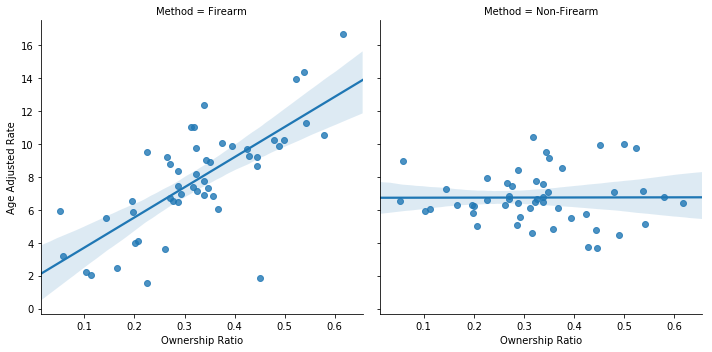

In [10]:
sns.lmplot(x='Ownership Ratio', y='Age Adjusted Rate', col='Method', data=df30)

The plots below further improve on this through clear, descriptive axis labels and chart titles. Changing the "ownership ratio" to a percentage of households also makes it easier for the viewer to understand.

In [11]:
df30['Ownership Percent'] = df30['Ownership Ratio']*100

Text(0.5,1.1,'More Guns, More Gun Suicides')

Text(-35,19,'2013 Gun Ownership and Method of Suicide in 50 U.S. States')

Text(-2.5,-2.5,'Source: CDC NCHS, Kalesan et al 2016')

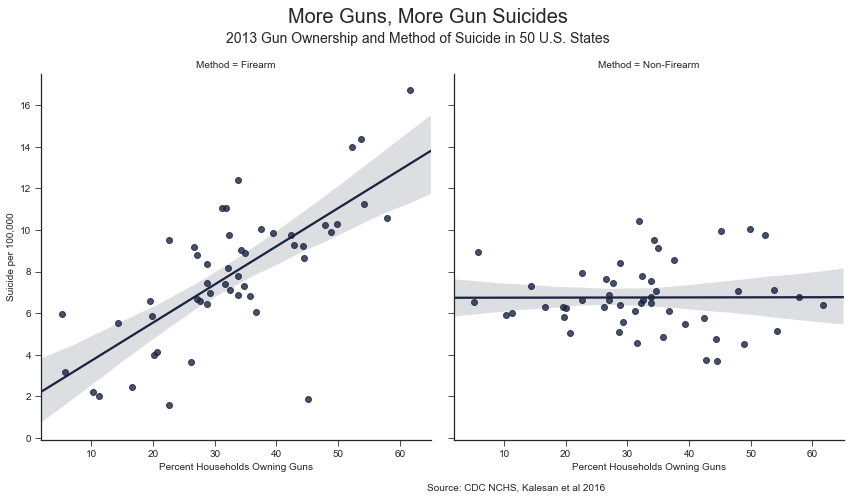

In [25]:
sns.lmplot(x='Ownership Percent', y='Age Adjusted Rate', col='Method', data=df30, size=6, palette='cubehelix').set_axis_labels(
    'Percent Households Owning Guns','Suicide per 100,000')

plt.suptitle('More Guns, More Gun Suicides', y=1.1, fontsize=20)
plt.text(-35,19,u'2013 Gun Ownership and Method of Suicide in 50 U.S. States', fontsize=14)
plt.text(-2.5,-2.5,u'Source: CDC NCHS, Kalesan et al 2016', fontsize=10)

## Counter graph: More gun owners does not mean more suicides

The previous graphs demonstrate that higher rates of gun ownership do in fact correlate with more suicides by gun, whereas there is no relationship between gun ownership rates and non-firearm suicide rates. But a more selective look at the data can reveal a different scenario. <br>
The previous graphs only looked at one year, 2013, because that was the only year with data on gun ownership. Now I will be using all of the data points so I can eventually narrow in on a middle zone where suicide rates don't appear to change. I'm also eliminating the distinction between method of suicide which so that the gun relationship cannot be isolated.

In [13]:
suicides1 = pd.read_csv('CDC_Suicides.csv')
own1 = own.drop(['Year','Population'],axis=1)
df31 = suicides1.merge(own1, how='left')
df31['Suicide Rate'] = df31['FAge Adjusted Rate'] + df31['NFAge Adjusted Rate']
df31['Suicides'] = df31['Fdeaths'] + df31['NFDeaths']
df31['Ownership Percent'] = df31['Ownership Ratio']*100

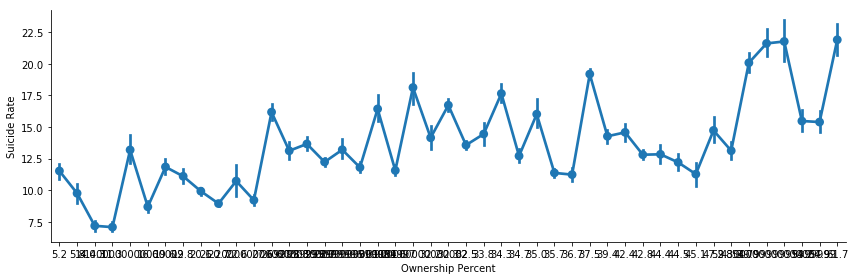

In [14]:
sns.factorplot(x='Ownership Percent', y='Suicide Rate', kind='point', data=df31, aspect=3)

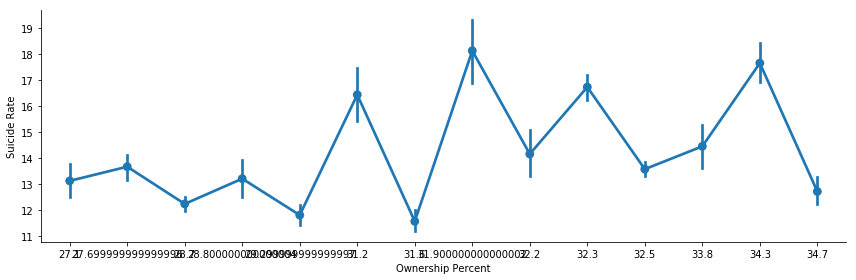

In [15]:
df32 = df31[(df31['Ownership Ratio'] > .27) & (df31['Ownership Ratio'] < .35)]
sns.factorplot(x='Ownership Percent', y='Suicide Rate', kind='point', data=df32, aspect=3)

The preliminary graph above shows how I've narrowed in on a small band of ownership ratios that really only represents about 18 states. The truncated axis further helps exagerate the differences in the rates so that the volatility looks more extreme than it necessarily is. <br>
Ultimately though I find the chart does better with more standardization and the smoothing that comes from using the mean values of the suicide rates. Again, since the data is grouped and subset, but this subsetting is unclear to the viewer, this graph presents a picture of suicide rates unconnected to gun ownership. 

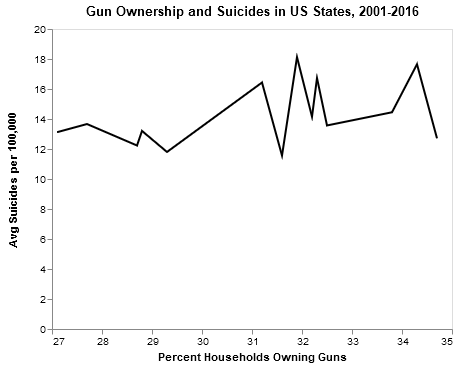

In [16]:
alt.Chart(df32, title='Gun Ownership and Suicides in US States, 2001-2016').mark_line(color='black').encode(
    x=alt.X('Ownership Percent', axis=alt.Axis(title='Percent Households Owning Guns', grid=False, ticks=True)),
    y=alt.Y('mean(Suicide Rate)', axis=alt.Axis(title='Avg Suicides per 100,000', grid=False, ticks=True)))

# Gun Laws and Gun Deaths 

Chart 8 features a heatmap of the United States overlayed with information about which states have more gun laws. While it is visually appealing to display the information by using the map, there is no reason for this. The viewer cannot readily determine the relationship between more gun laws and lower rates of gun deaths. The size differences in the states themselve contribute to the comparison problem. The layering of another additional data through shading on top of the color scale means the viewer is constantly trying to hold the legend in their mind as they attempt to unpack the meaning of the graphic.

![Chart-8](images/vox-chart-8.jpg)

My task in trying to improve upon this graphic then is to scrap the map and try a different representation. The original source for the image comes from a private research group and I was not able to determine where that organization had gathered the information from to generate this graphic. Additional online sleuthing did return information on gun laws in US states over time which had been compiled and primarily coded by the researcher Michael Siegel. Using the CDC NCHS Wonder tool, I then collected information on all deaths where the underlying cause was a firearm. The data covers all 50 states from 2001 to 2016. CDC information included the District of Columbia, but was not part of the gun laws dataset.

In [17]:
laws = pd.read_csv('State Gun Laws.csv')
deaths = pd.read_csv('CDC_GunDeaths.csv')

In [18]:
laws = laws[['state','year','lawtotal']]
laws.columns = ['State', 'Year', 'Laws']
df20 = deaths.merge(laws)
abbr = pd.read_csv('state_table.csv') #state name abbreviations
abbr = abbr[['name','abbreviation']]
df20 = df20.merge(abbr,left_on='State',right_on='name')

The key information that is to be conveyed here is the relationship between the number of gun laws a state has and the rate of gun deaths per 100,000 people in that state. A regression plot with a fitted line will best convey this type of information. The plot below shows the number of gun laws and the rate of gun deaths for each year from 2001 to 2016. The fitted regression line shows that as the number of gun laws increases, the rate of gun deaths decreases. While this is not showing causation, it is clearing showing negative correlation. But this graph is not yet complete.

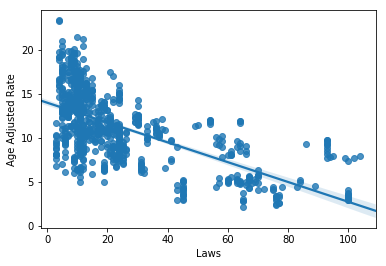

In [19]:
sns.regplot(x='Laws', y='Age Adjusted Rate', data=df20)

Text(0.5,1,'Gun Control Laws and Gun Deaths in 50 U.S. States, 2001-2016')

Text(0.5,1.05,'More Gun Laws, Fewer Gun Deaths')

Text(0,-4,'Source: CDC NCHS, Michael Siegel')

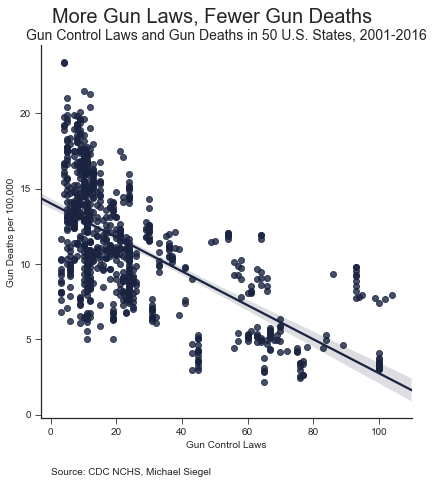

In [24]:
sns.lmplot(x='Laws', y='Age Adjusted Rate', data=df20, size=6).set_axis_labels(
    'Gun Control Laws','Gun Deaths per 100,000')

plt.title('Gun Control Laws and Gun Deaths in 50 U.S. States, 2001-2016', fontsize=14)
plt.suptitle('More Gun Laws, Fewer Gun Deaths', y=1.05, fontsize=20)
plt.text(0,-4,u'Source: CDC NCHS, Michael Siegel')

This revised version improves the original through clear, descriptive axis and chart labels and the color has been removed. Previously I had considered using the state averages over time, but since we are looking for the relationship between laws and deaths at a given point in time, it ultimately made more sense to show this point for point.

## Counter graph: More gun laws don't lead to lower rates of gun deaths 

The previous graph of the data used the regression plot with fitted line to demonstrate a clear, inverse relationship between the number of gun control laws and the rate of gun deaths in a state in a given year. We can take that same dataset, and narrow in on a specific area of the data to show minimal relationship between these to points. This was in fact what I showed in my first draft of the deceptive chart. However this level of data manipulation isn't even necessary to confuse the issue of gun control laws and gun deaths.

To begin with, I reduced the dataset to the averages for each state over the 15 years in the dataset. Then, a simple regression plot will help me identify the cases which disprove the broader trend. I then use that range to create a confusing looking graph which shows varying numbers of gun laws with a relatively stable gun death rate.

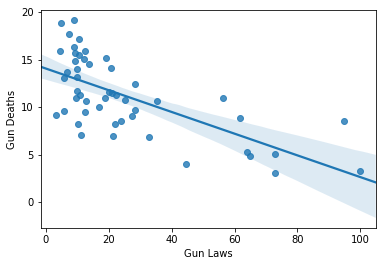

In [21]:
df21 = df20.groupby('abbreviation').mean().drop(['Crude Rate','Year','Population','Deaths'], axis=1)
df21.columns = ['Gun Deaths','Gun Laws']
df21.index.rename('State',inplace=True)
sns.regplot(x='Gun Laws',y='Gun Deaths',data=df21)

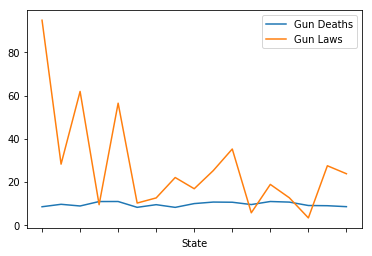

In [22]:
df22 = df21[(df21['Gun Deaths'] > 8) & (df21['Gun Deaths'] < 11)]
df22.plot()

Again, this graph is pulling out a selective range of data to provide the best contrast between the rates of gun deaths and the numbers of laws. But this isn't really necessary, because the graph is already making the comparison of this information confusing by sharing the same axis for both the number of gun laws and the rates of gun deaths. The diference in scale between these two variables means they are going to appear very differently on the chart and it will obscure the relationship. It's also using a line, which implies change over time, even though the x-axis is the state category.<br>

The revised graph below drops the range restrictions, allowing it to accurately claim the information in the title. Now there is more variablility evident in the lines, but the important point here is that the viewer is being forced to hold multiple pieces of information in the head at once in order to determine whether or not a relationship exists. The viewer must track which states have high gun laws, see whether they also have low gun deaths, and use other states as the basis for comparison. This all assumes the viewer is clear on which color line represents which piece of information. The fact that the information is presented without any discernable order (it is in fact in alphabetical order by state name), makes the task even more difficult. The sheer struggle to make sense of the information leads to an inevitable conclusion that there is no sense to be made from the information, and thus no relationship between gun laws and gun deaths.

Text(0.5,1,'Gun Control Laws and Gun Deaths in 50 U.S. States, 2001-2016')

Text(0.5,1.05,'More Gun Laws, Fewer Gun Deaths?')

Text(-5,-15,'Source: CDC NCHS, Michael Siegel')

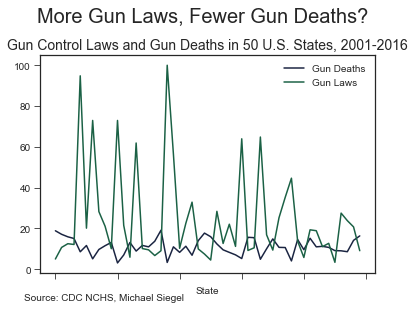

In [23]:
sns.set_style('ticks')
sns.set_palette('cubehelix')

df21.plot()
plt.title('Gun Control Laws and Gun Deaths in 50 U.S. States, 2001-2016', fontsize=14)
plt.suptitle('More Gun Laws, Fewer Gun Deaths?', y=1.05, fontsize=20)
plt.text(-5,-15,u'Source: CDC NCHS, Michael Siegel')

## References

CDC National Center for Health Statistics (NCHS). Underlying Cause of Death 1999-2016. Saved request: https://wonder.cdc.gov/controller/saved/D76/D35F899

CDC National Center for Injury Prevention and Control. WISQARS™ (Web-based Injury Statistics Query and Reporting System). https://www.cdc.gov/injury/wisqars/index.html

Kalesan B, Villarreal MD, Keyes KM, et al Gun ownership and social gun culture Injury Prevention 2016;22:216-220. http://dx.doi.org/10.1136/injuryprev-2015-041586

Lopez, George. "America’s unique gun violence problem, explained in 17 maps and charts." Vox.com. Accessed May 5, 2018.
https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts

Miller, Matthew, M.D., Sc.D., and David Hemenway, Ph.D. Guns and Suicide in the United States. N Engl J Med 2008; 359:989-991. September 4, 2008. DOI: 10.1056/NEJMp0805923

Siegel, Michael. State Firearm Laws. State Laws by Year. Accessed May 5, 2018. https://www.statefirearmlaws.org/table.html
